In [34]:
import numpy as np 
import matplotlib.pyplot as plt

2.636743524900418


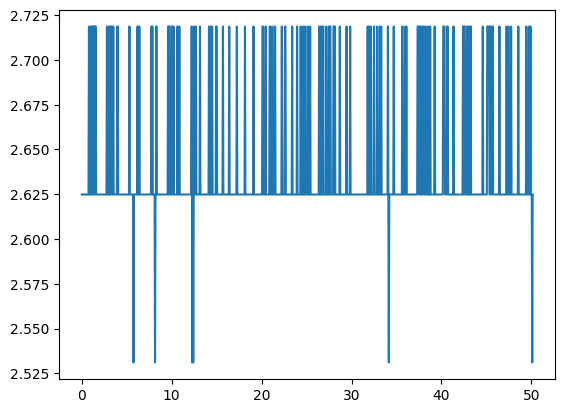

In [35]:
gl0t = np.loadtxt("gl0t_01.txt", skiprows = 2)

tid = gl0t[:,0]
sp = gl0t[:,1]

print(sum(sp) / len(sp))

fig, ax = plt.subplots()
ax.plot(tid,sp)

In [54]:
data_dict = {}

start_index = 0
end_index = 9

for i in range(start_index, end_index):  
    filename = f"gl{i*5}t_01.txt"
    data = np.loadtxt(filename, skiprows=2)  
    data_dict[filename] = data

2.636743524900418
2.6572062888446295
2.6126365886454415
2.747466981075671
2.8178075737051764
2.822556665338642
2.6599159681274993
2.333283997011949
1.768013349601573
23.055630937251003


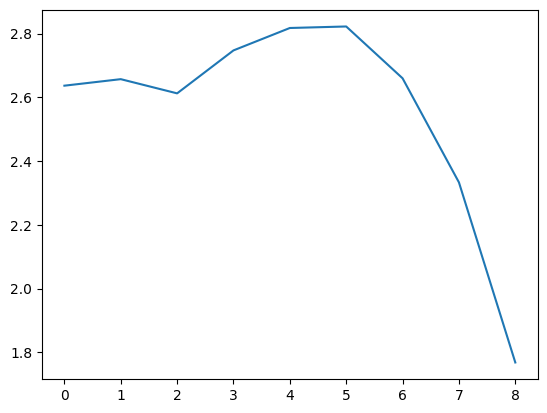

In [63]:
mean = []

for i in range(start_index, end_index):
    filename = f"gl{i*5}t_01.txt"
    if filename in data_dict:
        time = data_dict[filename][:,0]
        volt = data_dict[filename][:,1]
        mv = sum(volt) / len(volt)
        print(mv)
        mean.append(mv)

print(sum(mean))
fig, ax = plt.subplots()
ax.plot(mean)